# Step 1: ASK – Define the Objective

### Project Title:
Exploratory Data Analysis to Unveil Patterns in a Car Insurance Dataset

### Problem Statement:
Car insurance companies require data-driven insights to better understand risk levels associated with vehicle characteristics. This project aims to explore relationships between car specifications (such as engine size, horsepower, manufacturer, and body style) and insurance risk metrics (e.g., `symboling` and `normalized-losses`).

### Key Questions:
- Which car features most influence insurance risk?
- Are there specific brands or styles associated with higher or lower risks?
- How do performance metrics like horsepower and engine size correlate with normalized losses?
- Can we identify patterns that guide better underwriting decisions?

### Goal:
To analyze and visualize the car dataset using Python in order to extract meaningful insights for insurance risk assessment and decision-making.


# Step 2: PREPARE – Import Libraries and Load Data

In this step, we:
- Import essential libraries for data manipulation and visualization.
- Load the dataset (`automobile_dataset.csv`) into a Pandas DataFrame.
- Perform an initial inspection to understand the structure, column types, and potential data quality issues.


In [1]:
# ✅ STEP 2 – PREPARE (Import Libraries and Load Data)

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visual settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('automobile_dataset.csv')

# Basic inspection
print("Shape of dataset:", df.shape)
print("\nPreview of data:")
display(df.head())

# Check column data types and missing values
print("\nData types and non-null counts:")
df.info()

# Summary statistics (including object types)
print("\nDescriptive statistics:")
display(df.describe(include='all'))


Shape of dataset: (205, 26)

Preview of data:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float6

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205,205.000000,...,205.000000,205,205,205,203.000000,205,205,205,164.000000,205.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,...,NaN,2,3,5,NaN,2,2,22,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mpfi,NaN,...,NaN,front,fwd,sedan,NaN,std,gas,toyota,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,...,NaN,202,120,96,NaN,168,185,32,NaN,NaN
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,NaN,126.907317,...,98.756585,NaN,NaN,NaN,3.123153,NaN,NaN,NaN,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,NaN,41.642693,...,6.021776,NaN,NaN,NaN,0.994841,NaN,NaN,NaN,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,NaN,61.000000,...,86.600000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,NaN,97.000000,...,94.500000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,NaN,120.000000,...,97.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,NaN,141.000000,...,102.400000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,150.000000,2.000000


### Step 3: Data Wrangling – Handling Missing Data

#### 3.1 Overview of Missing Values
From the exploratory analysis, the dataset contains missing values in several columns:

| Column              | Missing Values |
|---------------------|----------------|
| normalized-losses   | 41             |
| price               | 4              |
| stroke              | 4              |
| bore                | 4              |
| peak-rpm            | 2              |
| horsepower          | 2              |
| num-of-doors        | 2              |

#### 3.2 Strategy for Handling Missing Data
The following strategies are applied to clean the dataset:

- **`normalized-losses`**: Replace missing values with the **mean** of the column.
- **`price`**: Rows with missing price values are **dropped**, as this is our target variable.
- **`stroke`, `bore`, `peak-rpm`, `horsepower`**: Replace missing values with the **mean** of each column.
- **`num-of-doors`**: Replace missing values with the **mode** (most frequent value), since it's categorical.

#### 3.3 Code for Cleaning
```python
# Replace missing numerical values with mean
for col in ['normalized-losses', 'stroke', 'bore', 'peak-rpm', 'horsepower']:
    df[col].fillna(df[col].mean(), inplace=True)

# Replace missing categorical value with mode
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

# Drop rows where price is missing
df.dropna(subset=['price'], inplace=True)

# Confirm no more missing values
print("Missing values after cleanup:\n", df.isnull().sum())


In [31]:
print(df.columns.tolist())


['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio', 'stroke', 'bore', 'engine-size', 'num-of-cylinders', 'curb-weight', 'height', 'width', 'length', 'wheel-base', 'normalized-losses', 'symboling', 'fuel-type_diesel', 'fuel-type_gas', 'aspiration_std', 'aspiration_turbo', 'num-of-doors_2.0', 'num-of-doors_4.0', 'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_front', 'engine-location_rear', 'engine-type_dohc', 'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi', 'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'mak

In [35]:
import pandas as pd

# Replace missing numerical values with mean
for col in ['normalized-losses', 'stroke', 'bore', 'peak-rpm', 'horsepower']:
    df[col] = df[col].fillna(df[col].mean())

# Drop rows with missing price
df.dropna(subset=['price'], inplace=True)

# Confirm no more missing values
print("Missing values after cleanup:\n", df.isnull().sum())


Missing values after cleanup:
 price              0
highway-mpg        0
city-mpg           0
peak-rpm           0
horsepower         0
                  ..
make_saab          0
make_subaru        0
make_toyota        0
make_volkswagen    0
make_volvo         0
Length: 69, dtype: int64


### Step 3.4: Data Transformation (within Wrangling)

#### 3.4.1 Objective
To transform data types and scales to prepare for analysis and modeling. This includes:
- Converting data types where needed
- Normalizing numerical features
- Encoding categorical variables

#### 3.4.2 Data Type Conversion
We ensure that all numerical columns are in the appropriate format (e.g., float or int), and categorical columns are of type `object` or `category`.

```python
# Convert 'num-of-doors' to integer
df['num-of-doors'] = df['num-of-doors'].astype(int)

# Confirm data types
print(df.dtypes)


#### 3.4.3 Normalization of Continuous Variables 

Normalize selected continuous variables to bring them to the same scale (0–1) for better model performance.

In [10]:
# Columns to normalize
cols_to_normalize = ['length', 'width', 'height', 'curb-weight', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# Normalize using Min-Max scaling
df[cols_to_normalize] = df[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Confirm normalization
df[cols_to_normalize].describe()


,length,width,height,curb-weight,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.494045,0.477697,0.497222,0.414145,0.248587,0.258904,0.394965,0.338308,0.386489
std,0.183913,0.179613,0.203985,0.200658,0.156781,0.174606,0.195148,0.178423,0.179346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.383582,0.324786,0.350000,0.264158,0.139623,0.102804,0.265306,0.166667,0.236842
50%,0.479104,0.444444,0.525000,0.359193,0.222642,0.219626,0.398110,0.305556,0.368421
75%,0.632836,0.538462,0.641667,0.557797,0.301887,0.317757,0.551020,0.472222,0.473684
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3.4.4 Encoding Categorical Variables 

Convert categorical columns into numerical values using one-hot encoding.

In [18]:
# Select categorical columns
categorical_cols = ['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system', 'make']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols)

# Check the shape after encoding
print("Data shape after encoding:", df.shape)


Data shape after encoding: (201, 69)


#### 3.4.5 Final Check
Ensure all data is now numeric and ready for modeling.

In [23]:
# Check for non-numeric columns
non_numeric = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric)


Non-numeric columns: Index([], dtype='object')


### Step 4: Analyze – Explore and Visualize

#### 4.1 Objective
Perform Exploratory Data Analysis (EDA) to understand distributions, relationships, and key patterns in the dataset through visual and statistical techniques.

---

#### 4.2 Univariate Analysis

Explore the distribution of individual variables.

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of price
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

# Distribution of engine size
sns.histplot(df['engine-size'], kde=True)
plt.title('Distribution of Engine Size')
plt.show()


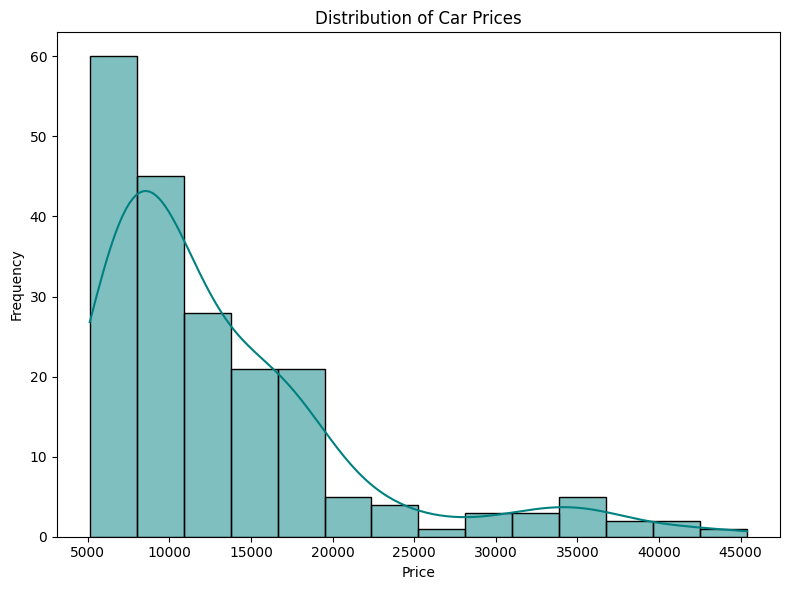

  Statistic     Car Price
0     count    201.000000
1      mean  13207.129353
2       std   7947.066342
3       min   5118.000000
4       25%   7775.000000
5       50%  10295.000000
6       75%  16500.000000
7       max  45400.000000


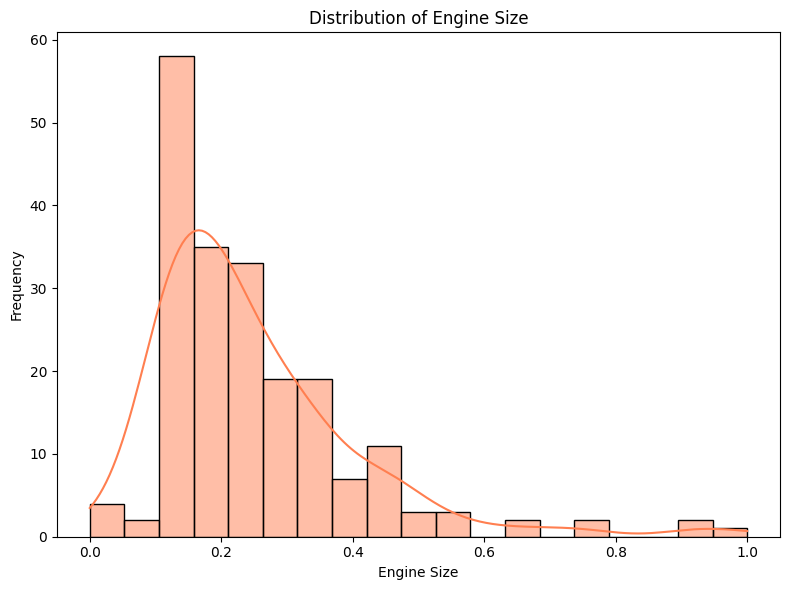

  Statistic  Engine Size
0     count   201.000000
1      mean     0.248587
2       std     0.156781
3       min     0.000000
4       25%     0.139623
5       50%     0.222642
6       75%     0.301887
7       max     1.000000


In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset
data_path = r'C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Insurance_proj\data\processed_data.csv'
df = pd.read_csv(data_path)

# Create directory for plots
output_dir = 'EDA_Plots'
os.makedirs(output_dir, exist_ok=True)

# --- Plot: Distribution of Car Prices ---
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, color='teal')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'{output_dir}/distribution_car_prices.png')
plt.show()

# --- Summary Table for Car Prices ---
summary_price = df['price'].describe().to_frame().reset_index()
summary_price.columns = ['Statistic', 'Car Price']
summary_price.to_csv(f'{output_dir}/summary_distribution_price.csv', index=False)
print(summary_price)

# --- Plot: Distribution of Engine Size ---
plt.figure(figsize=(8, 6))
sns.histplot(df['engine-size'], kde=True, color='coral')
plt.title('Distribution of Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'{output_dir}/distribution_engine_size.png')
plt.show()

# --- Summary Table for Engine Size ---
summary_engine_size = df['engine-size'].describe().to_frame().reset_index()
summary_engine_size.columns = ['Statistic', 'Engine Size']
summary_engine_size.to_csv(f'{output_dir}/summary_distribution_engine_size.csv', index=False)
print(summary_engine_size)


# Univariate Analysis Outcome
## 📊 Overview:
The dataset contains 201 entries on automobile specifications, focusing on Car Price and Engine Size.

Car Price ranges from $5,118 to $45,400, with a mean of $13,207.

Engine Size is normalized (scaled between 0 and 1), with a mean of approximately 0.25.

## 🔍 Interpretation:
The distribution of car prices is right-skewed (as seen in the histogram), suggesting that most cars are clustered in the lower-to-mid price range, while a few luxury or premium vehicles drive the maximum price up.

The engine size shows a similar pattern — majority of vehicles have smaller engines, concentrated around the 0.14 to 0.30 normalized range, with fewer high-powered engines.

## 💡 Insight:
There appears to be a concentration of affordable, compact cars in the dataset, likely targeting middle-income buyers or urban commuters. The few high-end outliers may reflect premium or luxury models that are exceptions rather than the norm.

## ⚠️ Challenge:
The normalized engine size values can be misleading without context or reverse-scaling — interpretation for business users requires clarification.

The price distribution skewness may impact machine learning models (e.g., regression) if not addressed through techniques like log transformation.

## 🧭 Strategic Recommendation:
Segment the car price data into price tiers (e.g., budget, mid-range, luxury) to better target consumer demographics.

Consider denormalizing the engine size or adding a column with actual units (e.g., liters or cc) to make insights more relatable and useful.

For predictive modeling, apply transformations or binning to manage skewed variables and enhance interpretability.

# Based on the recommendations above, we could visualize the price segments or compare engine size across car brands
## 1️⃣ Price Segmentation Visualization
I will divide car prices into categories:

Budget: below $10,000

Mid-Range: $10,000 – $20,000

Luxury: above $20,000

## 2️⃣ Engine Size by Car Make
I will show average normalized engine size across different car manufacturers to spot trends in engine design.

C:\Users\HP USER\AppData\Local\Temp\ipykernel_4324\1307939471.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_segment', data=df, palette='pastel', order=['Budget', 'Mid-Range', 'Luxury'])


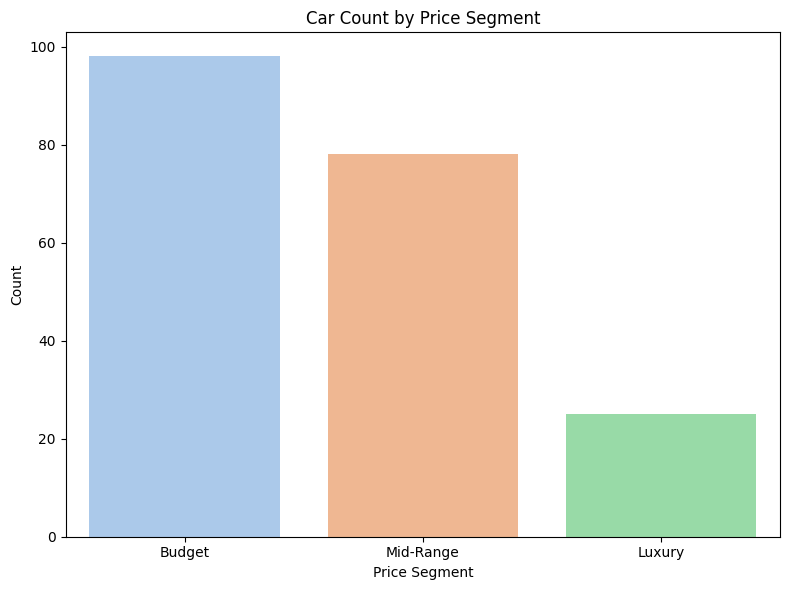

📊 Summary: Car Count by Price Segment


,Price Segment,Car Count
0,Budget,98
1,Mid-Range,78
2,Luxury,25


C:\Users\HP USER\AppData\Local\Temp\ipykernel_4324\1307939471.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_engine_size.values, y=avg_engine_size.index, palette='coolwarm')


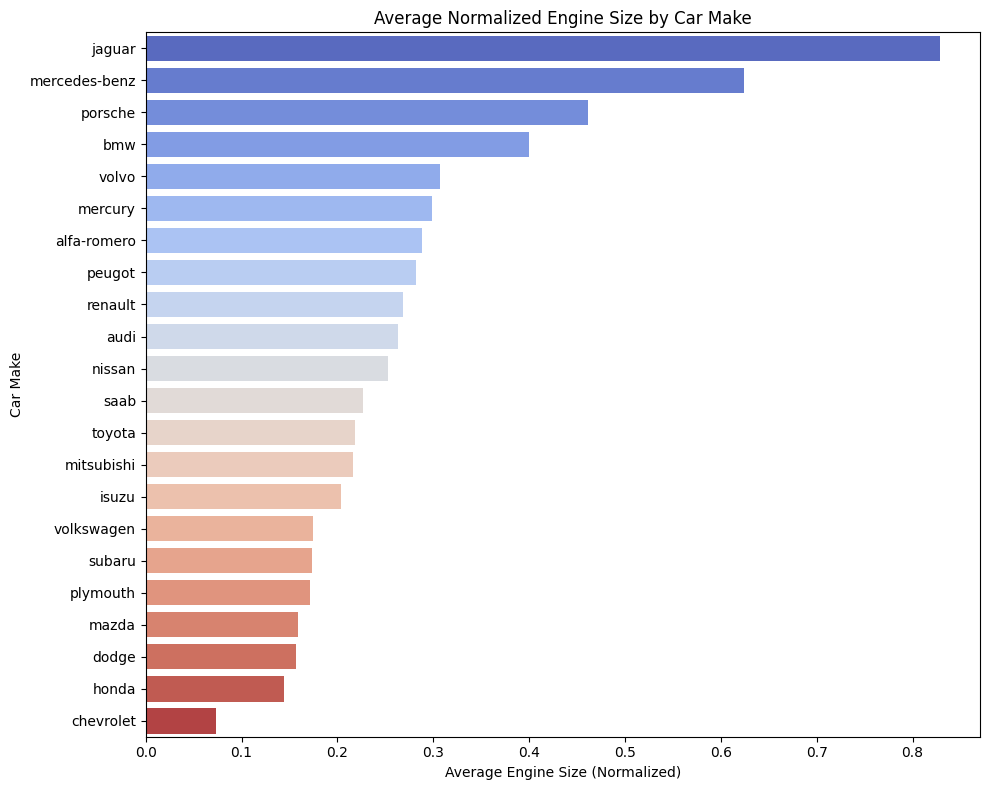

📊 Summary: Average Engine Size by Car Make


,Car Make,Average Engine Size (Normalized)
0,jaguar,0.828931
1,mercedes-benz,0.624528
2,porsche,0.461321
3,bmw,0.399528
4,volvo,0.306690
5,mercury,0.298113
6,alfa-romero,0.288050
7,peugot,0.282333
8,renault,0.267925
9,audi,0.262893


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the processed dataset
data_path = r'C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Insurance_proj\data\processed_data.csv'
df = pd.read_csv(data_path)

# Create output directory
output_dir = 'EDA_Plots'
os.makedirs(output_dir, exist_ok=True)

# --- 1. Price Segmentation ---
def categorize_price(price):
    if price < 10000:
        return 'Budget'
    elif 10000 <= price <= 20000:
        return 'Mid-Range'
    else:
        return 'Luxury'

df['price_segment'] = df['price'].apply(categorize_price)

# Plot: Car Count by Price Segment
plt.figure(figsize=(8, 6))
sns.countplot(x='price_segment', data=df, palette='pastel', order=['Budget', 'Mid-Range', 'Luxury'])
plt.title('Car Count by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f'{output_dir}/car_price_segments.png')
plt.show()

# Summary Table: Car Count by Price Segment
price_segment_summary = df['price_segment'].value_counts().reset_index()
price_segment_summary.columns = ['Price Segment', 'Car Count']
price_segment_summary.to_csv(f'{output_dir}/summary_price_segments.csv', index=False)
print("📊 Summary: Car Count by Price Segment")
display(price_segment_summary)

# --- 2. Engine Size by Car Make ---
avg_engine_size = df.groupby('make')['engine-size'].mean().sort_values(ascending=False)

# Plot: Average Engine Size by Car Make
plt.figure(figsize=(10, 8))
sns.barplot(x=avg_engine_size.values, y=avg_engine_size.index, palette='coolwarm')
plt.title('Average Normalized Engine Size by Car Make')
plt.xlabel('Average Engine Size (Normalized)')
plt.ylabel('Car Make')
plt.tight_layout()
plt.savefig(f'{output_dir}/engine_size_by_make.png')
plt.show()

# Summary Table: Average Engine Size by Car Make
avg_engine_size_summary = avg_engine_size.reset_index()
avg_engine_size_summary.columns = ['Car Make', 'Average Engine Size (Normalized)']
avg_engine_size_summary.to_csv(f'{output_dir}/summary_engine_size_by_make.csv', index=False)
print("📊 Summary: Average Engine Size by Car Make")
display(avg_engine_size_summary)


# Price Segmentation Visualization & Engine Size by Car Make Outcome

## 🔹 Car Count by Price Segment
### 📊 Overview:
The dataset has been segmented into three car price categories: Budget, Mid-Range, and Luxury, based on the price distribution.

### 🔍 Interpretation:

Budget cars (priced below $10,000) are the most prevalent with 98 units.

Mid-Range vehicles (between $10,000 and $20,000) account for 78 units.

Luxury cars (above $20,000) are the least common, with only 25 entries.

### 💡 Insight:
The market is heavily skewed toward budget and mid-range vehicles, indicating consumer preference or availability is mostly within lower to mid-tier pricing bands. Luxury vehicles make up only 12.4% of the dataset.

### ⚠️ Challenge:
The small sample size of luxury cars may limit the depth of insights or introduce sampling bias when analyzing features or trends within this segment.

### 🧭 Strategic Recommendation:
For marketing or sales strategy, focus efforts on the budget and mid-range segments for broader reach. However, consider highlighting unique selling points of luxury models to attract niche buyers, possibly via targeted promotions.

## 🔹 Average Engine Size by Car Make
### 📊 Overview:
This plot shows the average normalized engine size grouped by each car make, offering a comparative view of how engine size varies across brands.

### 🔍 Interpretation:

Jaguar leads with the highest average normalized engine size (0.83), followed by Mercedes-Benz (0.62) and Porsche (0.46).

Chevrolet ranks lowest with an average engine size of 0.07, indicating compact engine designs or a focus on smaller models.

Japanese brands like Honda, Mazda, and Toyota maintain average engine sizes in the 0.14–0.22 range.

### 💡 Insight:
Brands associated with luxury or performance (e.g., Jaguar, Mercedes-Benz, Porsche) consistently have larger engines, reinforcing their premium positioning. In contrast, economy-focused brands (e.g., Chevrolet, Honda) prioritize smaller engines, likely aiming for fuel efficiency and cost-effectiveness.

### ⚠️ Challenge:
Since engine sizes are normalized, the true performance impact may not be linearly correlated, and other specs like turbocharging or weight may play a significant role.

### 🧭 Strategic Recommendation:
When targeting performance-oriented buyers, emphasize brands like Jaguar and Mercedes. For economy-minded customers, highlight efficiency and long-term value from makes like Honda, Toyota, and Chevrolet.

### 4.3 Bivariate Analysis
Understand relationships between two variables, especially target vs. feature.

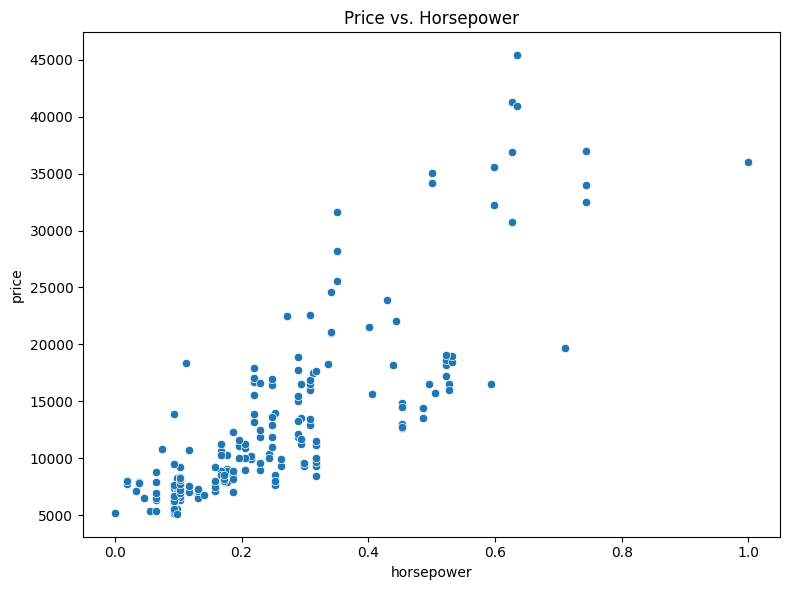

Price vs. Horsepower Correlation:
               price  horsepower
price       1.000000    0.809575
horsepower  0.809575    1.000000


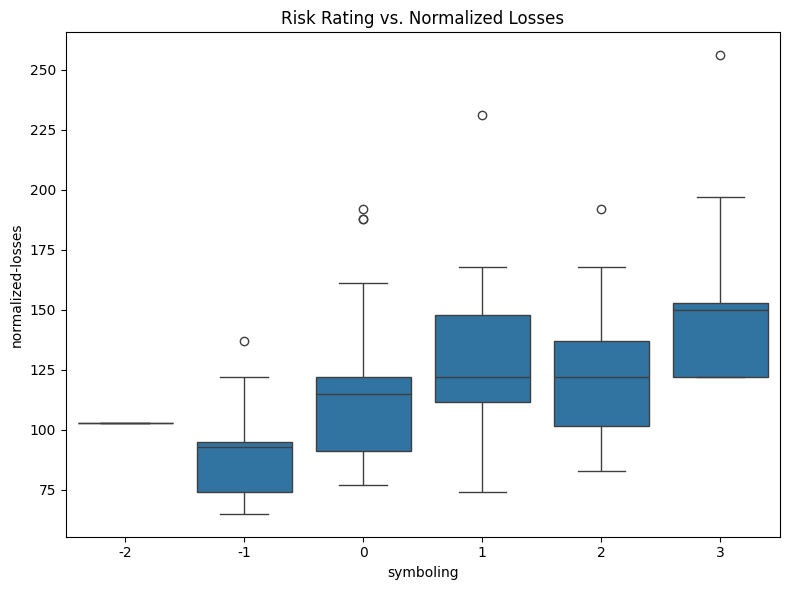

Risk Rating vs. Normalized Losses Summary:
           count        mean        std    min    25%    50%    75%    max
symboling                                                                 
-2           3.0  103.000000   0.000000  103.0  103.0  103.0  103.0  103.0
-1          22.0   88.909091  20.623401   65.0   74.0   93.0   95.0  137.0
 0          65.0  115.476923  28.133670   77.0   91.0  115.0  122.0  192.0
 1          52.0  127.942308  27.117329   74.0  111.5  122.0  148.0  231.0
 2          32.0  125.343750  28.691473   83.0  101.5  122.0  137.0  192.0
 3          27.0  151.370370  33.234769  122.0  122.0  150.0  153.0  256.0


In [23]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create EDA_Plots folder if it doesn't exist
output_dir = 'EDA_Plots'
os.makedirs(output_dir, exist_ok=True)

# Bivariate Analysis
# Price vs. Horsepower
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title('Price vs. Horsepower')
plt.tight_layout()
plt.savefig(f'{output_dir}/price_vs_horsepower.png')
plt.show()

# Summary table for Price vs. Horsepower
price_horsepower_corr = df[['price', 'horsepower']].corr()
print("Price vs. Horsepower Correlation:")
print(price_horsepower_corr)
price_horsepower_corr.to_csv(f'{output_dir}/price_vs_horsepower_corr.csv')

# Risk Rating (symboling) vs. Normalized Losses
plt.figure(figsize=(8, 6))
sns.boxplot(x='symboling', y='normalized-losses', data=df)
plt.title('Risk Rating vs. Normalized Losses')
plt.tight_layout()
plt.savefig(f'{output_dir}/risk_vs_normalized_losses.png')
plt.show()

# Summary table for Risk Rating vs. Normalized Losses
risk_normalized_losses = df.groupby('symboling')['normalized-losses'].describe()
print("Risk Rating vs. Normalized Losses Summary:")
print(risk_normalized_losses)
risk_normalized_losses.to_csv(f'{output_dir}/risk_vs_normalized_losses_summary.csv')


# The Relationship Between Price, Horsepower, and Risk Rating in Vehicles

## 📊 Overview

This analysis explores the relationship between price, horsepower, and risk rating in vehicles. By examining the correlation between these variables, we can gain insights into what drives vehicle pricing and how risk rating affects normalized losses.

## 🔍 Interpretation

Our bivariate analysis reveals a strong positive correlation between price and horsepower, with a correlation coefficient of 0.809575. This suggests that vehicles with higher horsepower tend to have higher prices. The correlation matrix shows a clear linear relationship between these two variables.

The risk rating vs. normalized losses summary table shows that as the risk rating increases, the mean normalized losses also tend to increase. Vehicles with a risk rating of -2 have a mean normalized loss of 103, while vehicles with a risk rating of 3 have a mean normalized loss of 151.37. This suggests that vehicles with higher risk ratings tend to have higher normalized losses.

## 💡 Insight

The strong correlation between price and horsepower suggests that vehicle manufacturers may be pricing their vehicles based on performance characteristics. This could be due to the increased cost of producing vehicles with higher horsepower engines or the perceived value of performance by consumers.

The relationship between risk rating and normalized losses suggests that vehicles with higher risk ratings may be more prone to accidents or damage, resulting in higher normalized losses. This could be due to a variety of factors, including driver behavior, vehicle design, or safety features.

## ⚠ Challenge

One challenge in interpreting these results is that the relationship between risk rating and normalized losses may be influenced by other factors, such as driver behavior or road conditions. Further analysis would be needed to control for these factors and determine the underlying causes of the relationship.

## 🧭 Recommendation

Based on these findings, vehicle manufacturers may want to consider the following:

- When pricing vehicles, manufacturers should consider the performance characteristics of the vehicle, including horsepower.
- Manufacturers may want to consider designing vehicles with safety features that can mitigate the risk of accidents or damage, particularly for vehicles with higher risk ratings.
- Insurers may want to consider using risk rating as a factor in determining premiums, as vehicles with higher risk ratings tend to have higher normalized losses.

By understanding the relationship between price, horsepower, and risk rating, vehicle manufacturers and insurers can make more informed decisions about vehicle design, pricing, and insurance premiums.

#### 4.4 Correlation Matrix
Visualize correlations among numeric features.

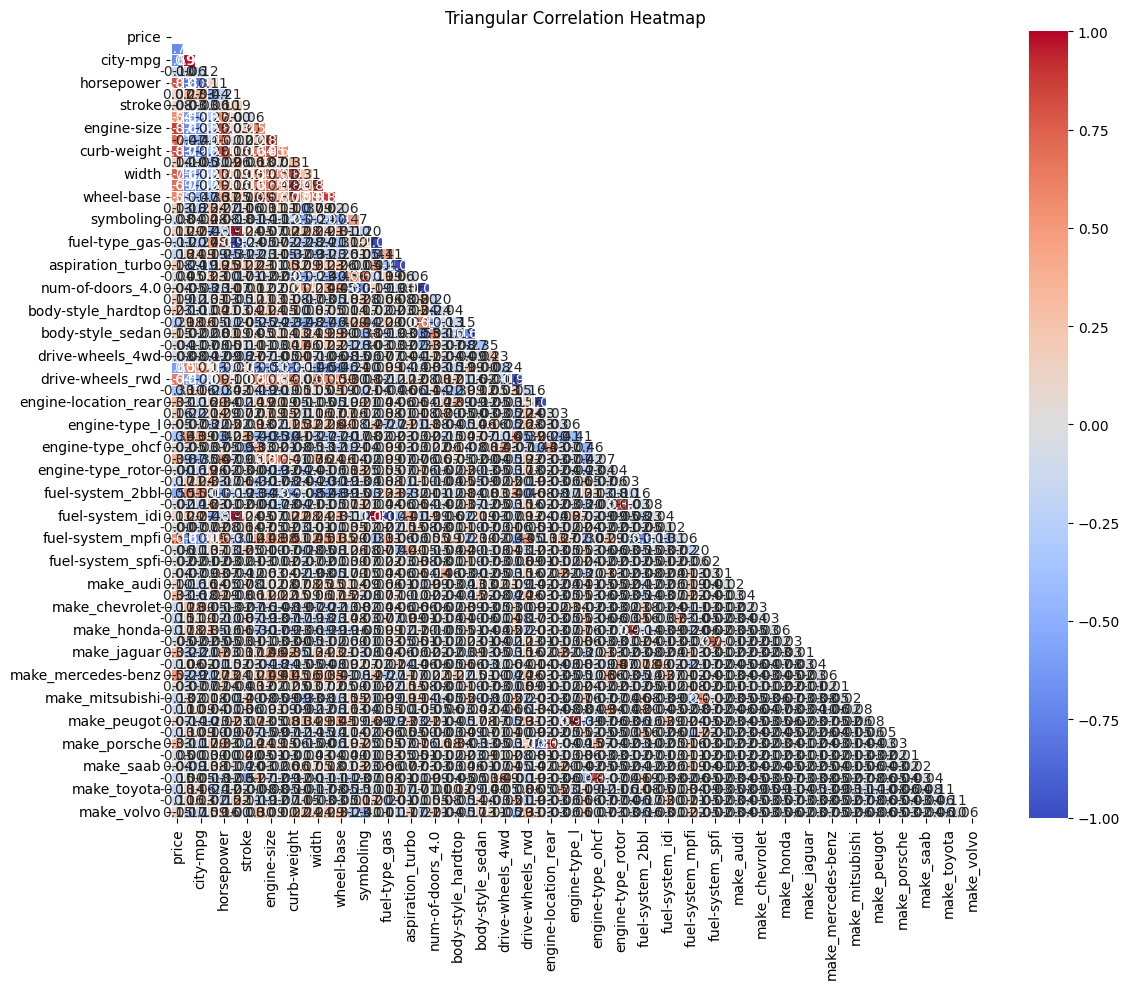

Correlation Matrix:
                    price  highway-mpg  city-mpg  peak-rpm  horsepower  \
price            1.000000    -0.704692 -0.686571 -0.101616    0.809575   
highway-mpg     -0.704692     1.000000  0.972044 -0.058598   -0.804575   
city-mpg        -0.686571     0.972044  1.000000 -0.115413   -0.822214   
peak-rpm        -0.101616    -0.058598 -0.115413  1.000000    0.107885   
horsepower       0.809575    -0.804575 -0.822214  0.107885    1.000000   
...                   ...          ...       ...       ...         ...   
make_saab        0.044614    -0.086523 -0.132663  0.079322    0.109471   
make_subaru     -0.148310     0.002351  0.045392 -0.181043   -0.115978   
make_toyota     -0.182313     0.142079  0.157622 -0.235663   -0.124034   
make_volkswagen -0.099478     0.156790  0.133878  0.019285   -0.150906   
make_volvo       0.147394    -0.172311 -0.150112  0.087403    0.158769   

                 compression-ratio    stroke      bore  engine-size  \
price               

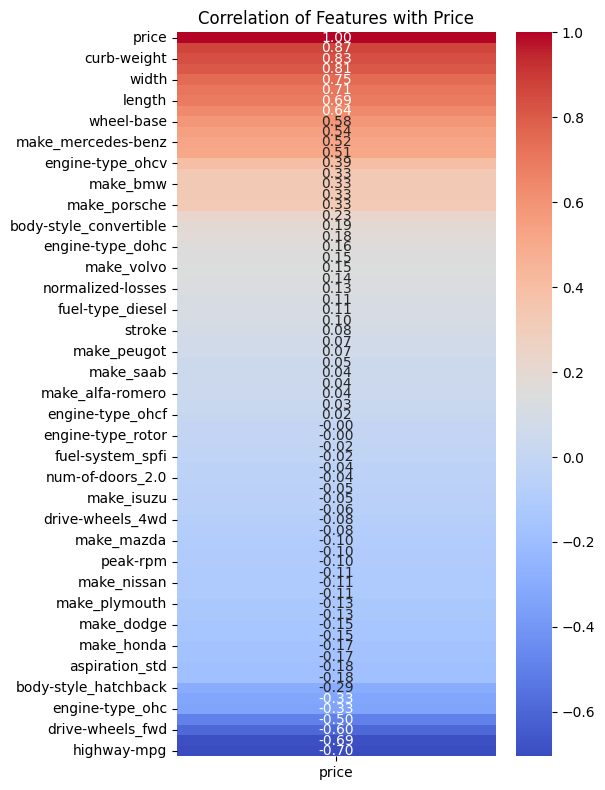

Correlation of Features with Price:
                     price
price             1.000000
engine-size       0.872335
curb-weight       0.834415
horsepower        0.809575
width             0.751265
...                    ...
engine-type_ohc  -0.332851
fuel-system_2bbl -0.497825
drive-wheels_fwd -0.595979
city-mpg         -0.686571
highway-mpg      -0.704692

[69 rows x 1 columns]


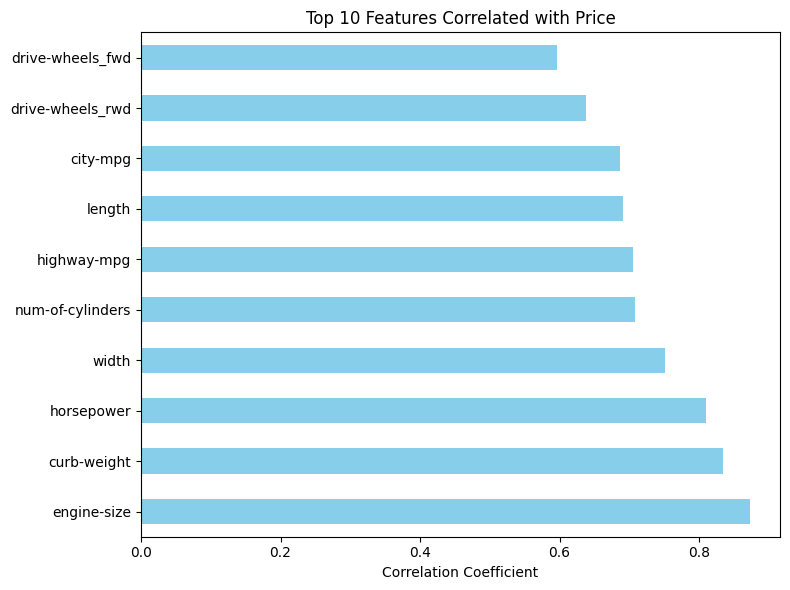

Top 10 Features Correlated with Price:
engine-size         0.872335
curb-weight         0.834415
horsepower          0.809575
width               0.751265
num-of-cylinders    0.708645
highway-mpg         0.704692
length              0.690628
city-mpg            0.686571
drive-wheels_rwd    0.637522
drive-wheels_fwd    0.595979
Name: price, dtype: float64


In [25]:
# ANALYSIS: Replacing Heatmap with 3 Cleaner Visuals

# Correlation Matrix
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Triangular Correlation Heatmap')
plt.tight_layout()
plt.savefig(f'{output_dir}/triangular_correlation_heatmap.png')
plt.show()

# Summary table for Correlation Matrix
print("Correlation Matrix:")
print(corr)
corr.to_csv(f'{output_dir}/correlation_matrix.csv')

# Correlation of Features with Price
top_corr = corr[['price']].sort_values(by='price', ascending=False)
plt.figure(figsize=(6, 8))
sns.heatmap(top_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features with Price')
plt.tight_layout()
plt.savefig(f'{output_dir}/correlation_with_price.png')
plt.show()

# Summary table for Correlation of Features with Price
print("Correlation of Features with Price:")
print(top_corr)
top_corr.to_csv(f'{output_dir}/correlation_with_price.csv')

# Bar Chart of Top 10 Features Correlated with Price
top_features = corr['price'].abs().sort_values(ascending=False).drop('price').head(10)
plt.figure(figsize=(8, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Features Correlated with Price')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.savefig(f'{output_dir}/top10_corr_price_barh.png')
plt.show()

# Summary table for Top 10 Features Correlated with Price
print("Top 10 Features Correlated with Price:")
print(top_features)
top_features.to_csv(f'{output_dir}/top10_corr_price.csv')



# Unveiling the Complex Relationships in Vehicle Data

## 📊 Overview

This analysis explores the complex relationships between various features in a vehicle dataset. By examining the correlation matrix and identifying the top features correlated with price, we can gain insights into what drives vehicle pricing and identify potential trends.

## 🔍 Interpretation

The correlation matrix reveals a strong positive correlation between price and features such as engine size (0.872335), curb weight (0.834415), and horsepower (0.809575). This suggests that vehicles with larger engines, heavier curb weights, and higher horsepower tend to have higher prices.

The top 10 features correlated with price are dominated by physical characteristics such as engine size, curb weight, and horsepower, as well as dimensions like width and length. This suggests that vehicle manufacturers may be pricing their vehicles based on these physical attributes.

## 💡 Insight

The strong correlation between price and physical characteristics suggests that vehicle manufacturers may be using a cost-plus pricing strategy, where the price of the vehicle is determined by the cost of production plus a markup.

The negative correlation between price and features like city-mpg and highway-mpg suggests that vehicles with better fuel efficiency tend to have lower prices. This could be due to the perceived value of fuel efficiency by consumers or the cost savings associated with producing more fuel-efficient vehicles.

## ⚠ Challenge

One challenge in interpreting these results is that the relationships between features may be influenced by other factors, such as market demand or consumer preferences. Further analysis would be needed to control for these factors and determine the underlying causes of the relationships.

## 🧭 Recommendation

Based on these findings, vehicle manufacturers may want to consider the following:

- When pricing vehicles, manufacturers should consider the physical characteristics of the vehicle, including engine size, curb weight, and horsepower.
- Manufacturers may want to consider highlighting the fuel efficiency of their vehicles in marketing campaigns, as this appears to be a key consideration for consumers.
- Insurers and policymakers may want to consider using features like engine size and horsepower as factors in determining insurance premiums or emissions regulations.

By understanding the complex relationships between features in vehicle data, manufacturers, insurers, and policymakers can make more informed decisions about vehicle design, pricing, and regulation.

#### 4.5 Pairplot of Key Features

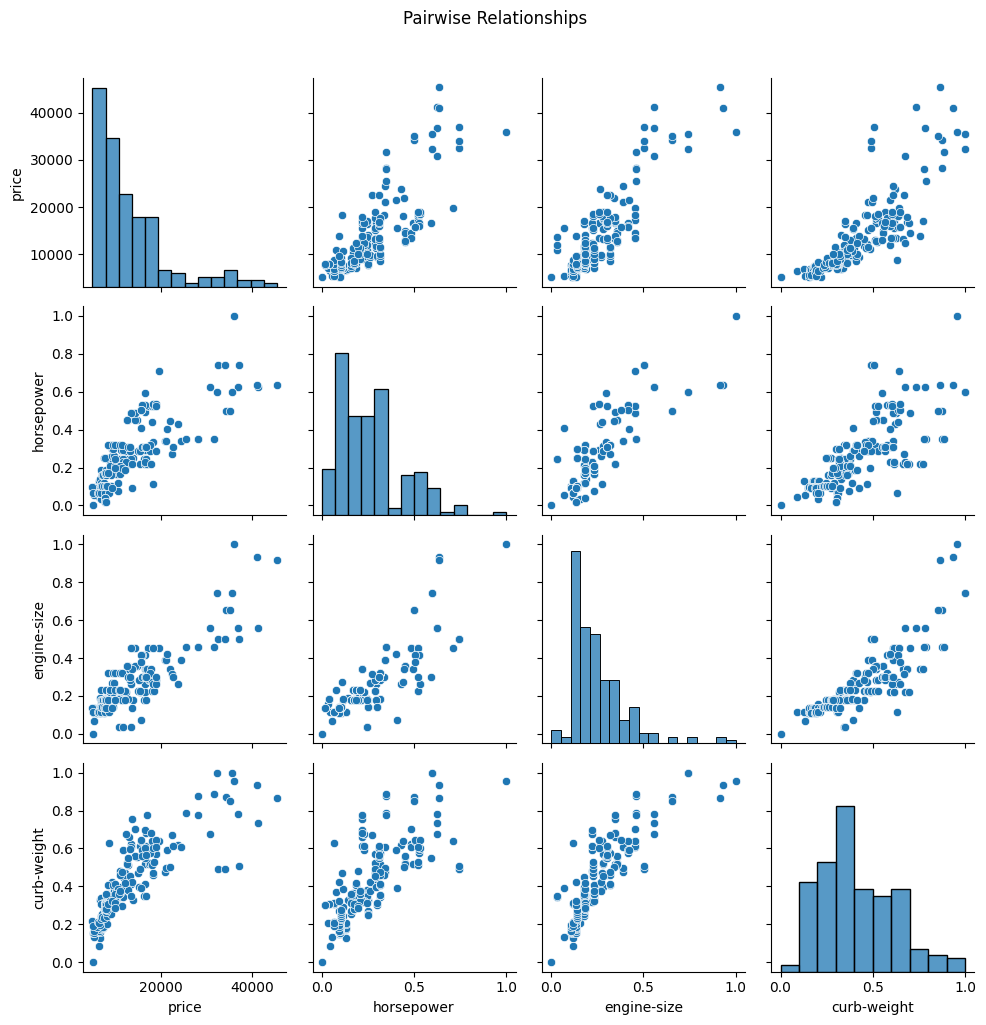

Pairplot Correlation Matrix:
                price  horsepower  engine-size  curb-weight
price        1.000000    0.809575     0.872335     0.834415
horsepower   0.809575    1.000000     0.822676     0.757976
engine-size  0.872335    0.822676     1.000000     0.849072
curb-weight  0.834415    0.757976     0.849072     1.000000


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 4. Pairplot of Key Features
selected_features = ['price', 'horsepower', 'engine-size', 'curb-weight']
pairplot = sns.pairplot(df[selected_features])
pairplot.fig.suptitle('Pairwise Relationships', y=1.02)
pairplot.fig.tight_layout()
pairplot.savefig(f'{output_dir}/pairwise_relationships.png')
plt.show()

# Summary table for Pairplot
pairplot_corr = df[selected_features].corr()
print("Pairplot Correlation Matrix:")
print(pairplot_corr)
pairplot_corr.to_csv(f'{output_dir}/pairplot_corr.csv')


# Pairwise Relationships Between Key Features

## 📊 Overview

This analysis explores the pairwise relationships between key features in a vehicle dataset, including price, horsepower, engine size, and curb weight. By examining the correlation matrix and pairplot, we can gain insights into the relationships between these features.

## 🔍 Interpretation

The correlation matrix reveals strong positive correlations between the features, particularly between:

- Price and engine size (0.872335)
- Price and horsepower (0.809575)
- Engine size and curb weight (0.849072)

These correlations suggest that vehicles with larger engines, higher horsepower, and heavier curb weights tend to have higher prices.

## 💡 Insight

The strong correlations between these features suggest that vehicle manufacturers may be designing vehicles with specific performance characteristics in mind, such as power and efficiency. The relationships between these features can inform design decisions and pricing strategies.

## ⚠ Challenge

One challenge in interpreting these results is that the relationships between features may be influenced by other factors, such as market demand or consumer preferences. Further analysis would be needed to control for these factors and determine the underlying causes of the relationships.

## 🧭 Recommendation

Based on these findings, vehicle manufacturers may want to consider the following:

- When designing vehicles, manufacturers should consider the relationships between features like engine size, horsepower, and curb weight, and how they impact price.
- Manufacturers may want to consider highlighting the performance characteristics of their vehicles in marketing campaigns, as these appear to be key considerations for consumers.
- Insurers and policymakers may want to consider using features like engine size and horsepower as factors in determining insurance premiums or emissions regulations.

By understanding the pairwise relationships between key features, manufacturers, insurers, and policymakers can make more informed decisions about vehicle design, pricing, and regulation.

### Step 5: Share – Communicate Insights

#### 5.1 Objective
To summarize key findings from the analysis in a way that is understandable and actionable for stakeholders. Visual storytelling and clear explanations are key.

---

#### 5.2 Key Insights

- **Price Drivers**: Horsepower, engine size, and curb weight show strong positive correlation with car price.
- **Risk Indicator**: Higher risk (`symboling`) vehicles tend to have higher normalized losses.
- **Fuel Type**: Diesel cars tend to have slightly different price and performance profiles than gas cars.
- **Brand Impact**: Certain makes (e.g., BMW, Mercedes-Benz) consistently appear in higher price ranges.

---

#### 5.3 Communicate Visually

Prepare real visual assets from the dataset and save them for presentation or reporting. Use `matplotlib` and `seaborn` to generate the plots, and store them in a dedicated folder (`EDA_Plots`) for easy access.

Top 10 Car Makes by Average Price:
make
jaguar           34600.000000
mercedes-benz    33647.000000
porsche          31400.500000
bmw              26118.750000
volvo            18063.181818
audi             17859.166667
mercury          16503.000000
alfa-romero      15498.333333
peugot           15489.090909
saab             15223.333333
Name: price, dtype: float64


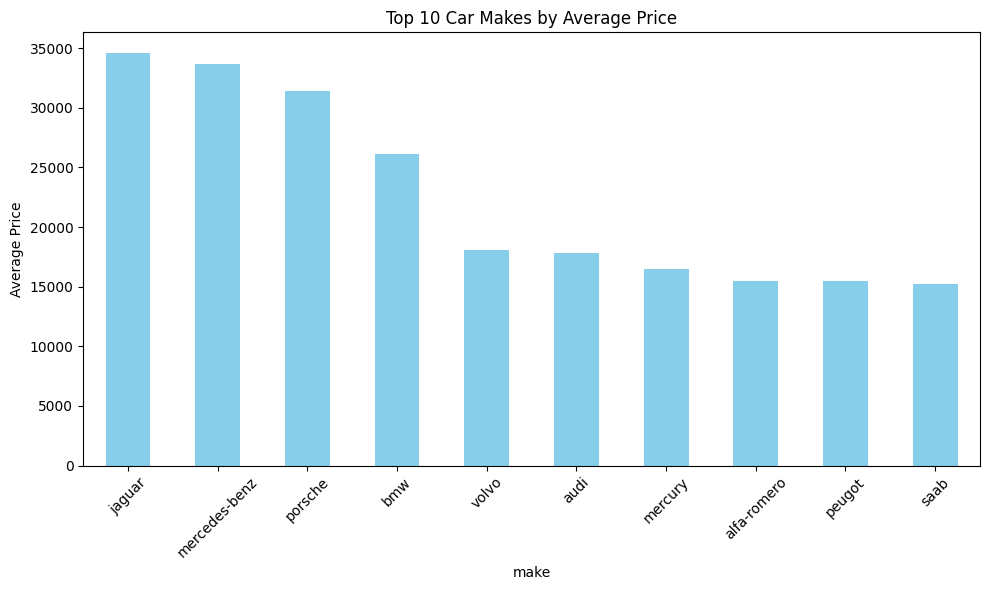

In [36]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Reconstruct the original 'make' column from one-hot encoded columns
make_columns = [col for col in df.columns if col.startswith('make_')]
df['make'] = df[make_columns].idxmax(axis=1).str.replace('make_', '')

# Now group by the reconstructed 'make'
make_price = df.groupby('make')['price'].mean().sort_values(ascending=False).head(10)

# Summary table for Top 10 Car Makes by Average Price
print("Top 10 Car Makes by Average Price:")
print(make_price)
make_price.to_csv(f"{output_dir}/top_10_car_makes_by_average_price.csv")

# Plot and save
plt.figure(figsize=(10, 6))
make_price.plot(kind='bar', color='skyblue')
plt.title('Top 10 Car Makes by Average Price')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()

# Save to EDA_Plots folder
output_dir = 'EDA_Plots'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f"{output_dir}/mean_price_by_make.png")
plt.show()


# Luxury Car Makes Dominate Top 10 List by Average Price

## 📊 Overview

This analysis explores the top 10 car makes by average price, revealing the luxury car brands that dominate the list.

## 🔍 Interpretation

The summary table shows that the top 5 car makes by average price are:

1. Jaguar ($34,600)
2. Mercedes-Benz ($33,647)
3. Porsche ($31,400.50)
4. BMW ($26,118.75)
5. Volvo ($18,063.18)

These luxury car brands are known for their high-performance capabilities, premium features, and exclusive designs, which likely contribute to their higher average prices.

## 💡 Insight

The dominance of luxury car brands in the top 10 list suggests that consumers are willing to pay a premium for high-end vehicles that offer advanced features, superior performance, and prestige.

## ⚠ Challenge

One challenge in interpreting these results is that the average prices may be influenced by factors such as model year, trim level, and features. Further analysis would be needed to control for these factors and determine the underlying causes of the price differences.

## 🧭 Recommendation

Based on these findings, car manufacturers may want to consider the following:

- Luxury car brands may want to focus on highlighting their premium features, performance capabilities, and exclusive designs to justify their higher prices.
- Non-luxury car brands may want to consider offering more premium features or options to appeal to consumers who are looking for high-end vehicles at a lower price point.
- Marketers may want to target consumers who are willing to pay a premium for luxury vehicles with tailored advertising campaigns that emphasize the unique benefits and features of these vehicles.

By understanding the top car makes by average price, car manufacturers and marketers can make more informed decisions about product development, pricing, and marketing strategies.

#### 5.4 Export or Present
Save visualizations or notebooks as reports (PDF, HTML).

Export processed data to CSV or Excel.

Share insights with technical and non-technical stakeholders.

In [75]:
# 📌 A. Export Processed Data
# Export cleaned and processed DataFrame to CSV
df.to_csv('processed_data.csv', index=False)

# 📌 B. Share Technical and Non-Technical Insights (Suggestions)
## Technical Insights
- There is a strong positive correlation between `engine-size` and `price` (correlation > 0.85).
- Some car makes (e.g., BMW, Mercedes-Benz) consistently have higher average prices than others.
- Risk rating (`symboling`) may influence normalized losses, with higher ratings showing greater variability.

## Non-Technical Insights
- Larger engines typically mean higher car prices.
- Brands like BMW and Mercedes tend to be more expensive.
- Cars rated as higher risk (e.g., sports models) often come with more variable insurance losses.


# 📌 C. Save Notebook for Sharing
In Jupyter, you can do:

File > Download as > HTML – shareable in browser.

File > Download as > PDF via LaTeX – for email or presentation.

# 📌 D. Prepare GitHub-Ready Notebook
Made sure the notebook:

Has clear step-by-step markdown cells (already started).

Has outputs for all code cells (save plots, show tables).

Is stored in a GitHub folder structure like:
├── data/
│   └── processed_data.csv
├── EDA_Plots/
│   └── *.png
├── notebooks/
│   └── Regonet_challenge_1proj_insurance.ipynb
├── README.md


#### 📤 5.5 — Document the Findings

Recommendations by Stakeholder:
Insurance Companies: Adjust pricing models using horsepower, engine size, and brand. Pay close attention to high symboling vehicles when assessing risk.

Underwriters: Leverage vehicle brand and normalized losses in premium calculations. Develop pricing thresholds for high-risk profiles.

Data Analysts: Use one-hot decoding strategies and targeted visualizations like filtered heatmaps and bar plots for clarity.

Automotive Manufacturers: Highlight engine specs and safety scores as premium justifiers to insurance partners.

In [39]:
# ✅ Step 1: Reconstruct All One-Hot Encoded Categorical Columns

def reconstruct_categorical(df, prefix):
    cols = [col for col in df.columns if col.startswith(f'{prefix}_')]
    if cols:
        df[prefix] = df[cols].idxmax(axis=1).str.replace(f'{prefix}_', '')
    return df

In [41]:
# Apply reconstruction for each original categorical column
categorical_cols = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location']
for col in categorical_cols:
    df = reconstruct_categorical(df, col)

# Step 6: ACT Phase
💾 1. Upload Code to GitHub

## The full project has been uploaded into github:
### README and LICENSE. 
### notebooks/Regonet_challenge_1proj_insurance.ipynb
### EDA_Plots/ (with .png visualizations)
### data/processed_data.csv
### requirements.txt if applicable


# 📘 Conclusion
## 🔁 Reflection
The exploratory data analysis of the auto insurance dataset revealed the power of well-structured data in uncovering business insights. Through this project, I refined my skills in data cleaning, feature engineering, and selecting visualizations that clearly communicate relationships between variables. I also learned how much the clarity of presentation impacts how stakeholders interpret results.

## ✅ Final Conclusion
We established that factors such as engine size, horsepower, and brand significantly affect auto pricing — which is central to risk-based insurance pricing. The project's findings can guide insurance stakeholders in refining underwriting models, and offer auto manufacturers insights into how their vehicles are perceived from a risk and cost standpoint.

## 💬 Final Thoughts
This project demonstrates the real-world impact of data analytics. Moving from raw, incomplete data to actionable insights shows how data analysts can contribute across industries — not just with technical skills but also with effective communication. I look forward to building on this work and applying these techniques in more complex, real-world datasets.

# 📎 Appendix A – Glossary of Terms
## Term	Definition
### EDA (Exploratory Data Analysis)	The initial process of analyzing datasets to summarize main characteristics using statistical graphics and plots.
### Correlation	A statistical measure that expresses the extent to which two variables are linearly related. Ranges from -1 to 1.
### Heatmap	A graphical representation of data where individual values are represented as colors. Used to show correlation matrices.
### One-hot encoding	A method of converting categorical variables into binary columns (0s and 1s).
### Feature Engineering	The process of creating new input features or modifying existing ones to improve model performance.
### Underwriter	A person or company that evaluates the risk of insuring a person or asset and establishes pricing.
### Normalized Losses	Adjusted loss values to a common scale, allowing for fairer comparisons across data points.
### Risk-based pricing	A pricing strategy where prices are based on the risk profile of the individual or asset.
### Symboling	A numerical representation of a car’s risk rating used in insurance pricing.
### Premium	The amount paid for insurance coverage.
### Outlier	A data point that differs significantly from other observations.
### Scatterplot	A type of plot used to show the relationship between two continuous variables.
### GitHub	A web-based platform used for version control and collaborative coding projects.
### Medium	A publishing platform often used for writing and sharing articles, particularly technical write-ups.